In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
file='https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv'
df=pd.read_csv(file)
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q1

In [3]:
df_1=df.dropna().reset_index()
df_1[['Age','Height','Weight','Salary']]


,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
2,22.0,6-5,185.0,1148640.0
3,21.0,6-8,235.0,1170960.0
4,25.0,7-0,238.0,2165160.0
...,...,...,...,...
359,23.0,6-8,206.0,1348440.0
360,26.0,6-6,206.0,981348.0
361,20.0,6-10,234.0,2239800.0
362,26.0,6-3,203.0,2433333.0


# Q2

In [4]:
pd.set_option('mode.chained_assignment', None)
df_1[['Feet','inch']] = df_1.Height.str.split("-",expand=True)
df_1['Height(cm)'] = df_1['Feet'].astype('float') * 30.48 + df_1['inch'].astype('float')*2.54
df_1.drop(['Feet','inch',"Height"], axis= 1, inplace=True)
df_1[['Age','Height(cm)','Weight','Salary']].dropna().reset_index(drop=True).head(3)

,Age,Height(cm),Weight,Salary
0,25.0,187.96,180.0,7730337.0
1,25.0,198.12,235.0,6796117.0
2,22.0,195.58,185.0,1148640.0


# Q3

Text(0.5, 1.0, 'Pie Plot to the position columns')

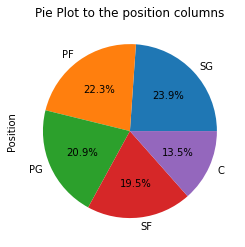

In [5]:
df_1['Position'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Pie Plot to the position columns")

<AxesSubplot:xlabel='Position', ylabel='count'>

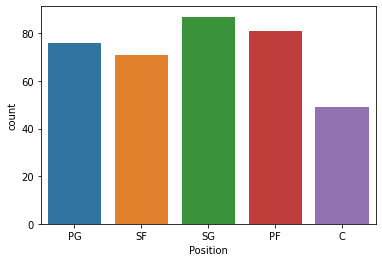

In [6]:
sns.countplot( x="Position", data=df_1)

# Q4

In [7]:
model = DecisionTreeRegressor(random_state=4)
features = ['Age','Height(cm)','Weight']
x = df_1[features]
y = df_1['Salary']
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)  
display(x_train.head())
display(pd.DataFrame(y_test.head()))

,Age,Height(cm),Weight
268,22.0,200.66,232.0
232,26.0,198.12,220.0
157,26.0,190.50,208.0
19,21.0,210.82,200.0
147,33.0,205.74,245.0


,Salary
193,2085671.0
33,1636842.0
15,6300000.0
347,3075880.0
57,3553917.0


# Q5

In [8]:
model = DecisionTreeRegressor(random_state=4)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=4)

# Q6

In [9]:
pred = model.predict(x_test)
def mse(a,b):
    return ('mse:{:.3f}'.format(np.sqrt(np.square(a-b).mean())))
mse(y_test.values,pred)

'mse:7069262.023'

# Q7

In [10]:
model_1 = DecisionTreeRegressor(random_state=4)
features = ['Age','Height(cm)','Weight','Position']
x = pd.get_dummies(df_1[features])
y = df_1['Salary']
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.3, random_state=42) 
model_1.fit(x_train, y_train)
pred = model_1.predict(x_test)
def mse(a,b):
    return ('mse:{:.3f}'.format(np.sqrt(np.square(a-b).mean())))
mse(y_test.values,pred)


'mse:6252250.381'

# Q8

In [26]:
model_1 = DecisionTreeRegressor(random_state=4,max_depth=3)
features = ['Age','Height(cm)','Weight','Position']
x = pd.get_dummies(df_1[features])
y = df_1['Salary']
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.3, random_state=42) 
model_1.fit(x_train, y_train)
pred = model_1.predict(x_test)
def mse(a,b):
    return ('mse:{:.3f}'.format(np.sqrt(np.square(a-b).mean())))
mse(y_test.values,pred)


'mse:4645313.302'